In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 设定随机种子
torch.manual_seed(2019)

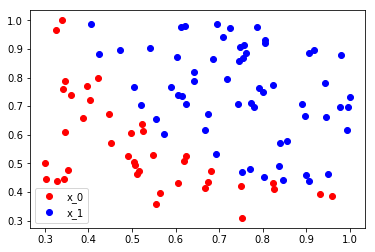

In [3]:
with open('./data.txt','r') as f:
    data_list=[i.split('\n')[0].split(',')for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]

x0_max=max([i[0] for i in data])
x1_max=max([i[1] for i in data])
data=[(i[0]/x0_max,i[1]/x1_max,i[2]) for i in data]

x0=list(filter(lambda x:x[-1] == 0.0,data))
x1=list(filter(lambda x:x[-1] == 1.0,data))

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [13]:
np_data=np.array(data,dtype='float32')
x_data=torch.from_numpy(np_data[:,0:2])
y_data=torch.from_numpy(np_data[:,-1]).unsqueeze(1)


In [14]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

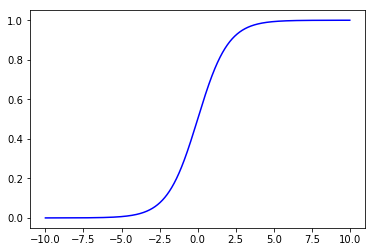

In [15]:
plot_x=np.arange(-10,10,0.01)
plot_y=sigmoid(plot_x)

plt.plot(plot_x,plot_y,'b')

In [16]:
x_data = Variable(x_data)
y_data = Variable(y_data)

In [18]:
print(x_data.shape)
print(y_data.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [19]:
import torch.nn.functional as F
w=Variable(torch.randn(2,1),requires_grad=True)
b=Variable(torch.randn(1),requires_grad=True)
def logistic_regression(x):
    return F.sigmoid(torch.mm(x,w)+b)

In [26]:
w0=w[0].data.numpy()
w1=w[1].data.numpy()
b0=b.data[0].numpy()

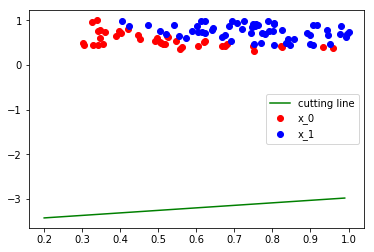

In [27]:
plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [28]:
def binary_loss(y_pred,y):
    logits=((y*y_pred.clamp(1e-12).log())+(1-y)*(1-y_pred).clamp(1e-12).log()).mean()
    return -logits

In [29]:
y_pred=logistic_regression(x_data)
loss=binary_loss(y_pred,y_data)
print(loss)

tensor(0.6888, grad_fn=<NegBackward>)


D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [30]:
loss.backward()
w.data=w.data-0.1*w.grad.data
b.data=b.data-0.1*b.grad.data

y_pred=logistic_regression(x_data)
loss=binary_loss(y_pred,y_data)
print(loss)

tensor(0.6879, grad_fn=<NegBackward>)


D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [32]:
from torch import nn

w=nn.Parameter(torch.randn(2,1))
b=nn.Parameter(torch.zeros(1))

def logistic_regression(x):
    return F.sigmoid(torch.mm(x,w)+b)

optimizer=torch.optim.SGD([w,b],lr=1.)


In [60]:
import time

start_time=time.time()
for e in range(1000):
    y_pred=logistic_regression(x_data)
    loss=binary_loss(y_pred,y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mask=y_pred.ge(0.5).float()  
    acc=((mask==y_data).sum().numpy()/y_data.shape[0])
    if (e+1)%200==0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.data, acc))
during=time.time()-start_time
print()
print('During Time: {:.3f} s'.format(during))

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 200, Loss: 0.20518, Acc: 0.89000
epoch: 400, Loss: 0.20507, Acc: 0.89000
epoch: 600, Loss: 0.20497, Acc: 0.89000
epoch: 800, Loss: 0.20488, Acc: 0.89000
epoch: 1000, Loss: 0.20479, Acc: 0.89000

During Time: 0.457 s


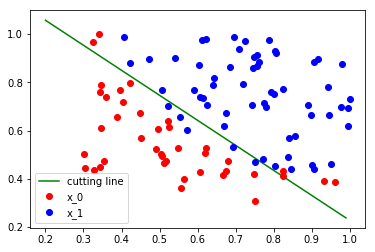

In [68]:
# 画出更新之后的结果
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()
b0 = b.data[0].numpy()

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [69]:
criterion=nn.BCEWithLogitsLoss()
w=nn.Parameter(torch.randn(2,1))
b=nn.Parameter(torch.zeros(1))

def logistic_reg(x):
    return torch.mm(x,w)+b

optimizer=torch.optim.SGD([w,b],1.)

In [70]:
y_pred=logistic_reg(x_data)
loss=criterion(y_pred,y_data)
print(loss.data)

tensor(0.7694)


In [72]:
# 同样进行 1000 次更新

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_reg(x_data)
    loss = criterion(y_pred, y_data)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 计算正确率
    #### GE 大于0.5返回1.
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().numpy() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.data, acc))

during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

epoch: 200, Loss: 0.31926, Acc: 0.87000
epoch: 400, Loss: 0.28774, Acc: 0.87000
epoch: 600, Loss: 0.26893, Acc: 0.87000
epoch: 800, Loss: 0.25637, Acc: 0.89000
epoch: 1000, Loss: 0.24737, Acc: 0.89000

During Time: 0.302 s
